<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embedded Method

### Lasso

In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn import linear_model
boston = load_boston()
iris = load_iris()

clf = linear_model.Lasso(alpha=0.02)
clf2 = linear_model.Lasso(alpha=1.0)

clf.fit(iris.data, iris.target)
clf2.fit(boston.data, boston.target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print(clf.coef_)
print(clf2.coef_)

[-0.         -0.          0.28753159  0.35223816]
[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]


In [0]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[i / 100 for i in range(20, 160)]}
gsearch = GridSearchCV(estimator=linear_model.Lasso(), param_grid=param, scoring='neg_mean_squared_error', cv=5)
gsearch.fit(boston.data, boston.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
                                   0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33,
                                   0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4,
                                   0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47,
                                   0.48, 0.49, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
gsearch.best_params_, gsearch.best_score_

({'alpha': 0.34}, -34.39508574344663)

In [0]:
clf2_new = linear_model.Lasso()
clf2_new.set_params(**gsearch.best_params_)
clf2_new.fit(boston.data, boston.target)
clf2_new.coef_

array([-0.08982818,  0.04971099, -0.01533312,  0.        , -0.        ,
        2.97598975, -0.        , -1.01940561,  0.27992229, -0.01531134,
       -0.76934896,  0.00982358, -0.62478315])

In [0]:
from sklearn.model_selection import cross_val_score
cv_old = cross_val_score(clf2, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
cv_new = cross_val_score(clf2_new, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')

print(cv_old)
print(cv_new)
print("mean square error: %0.2f" % (-cv_old.mean()))
print("mean squere error: %0.2f" % (-cv_new.mean()))

[ -11.75904887  -17.87218543  -10.52504673  -60.79224355  -46.77806854
  -40.75196077  -17.30562005 -102.67754279  -22.8731834   -13.30594575]
[  -9.72852188  -12.98367921   -8.81546149  -44.85618364  -32.16751449
  -23.07826919  -11.50192018 -145.81394445  -30.340357    -13.14468566]
mean square error: 34.46
mean squere error: 33.24


In [0]:
from sklearn.feature_selection import SelectFromModel

clf2_new = clf2_new.fit(boston.data, boston.target)
model = SelectFromModel(clf2_new, prefit=True)
X_new = model.transform(boston.data)
print(X_new.shape)
print(boston.data[0])
print(X_new[0])

(506, 10)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[6.320e-03 1.800e+01 2.310e+00 6.575e+00 4.090e+00 1.000e+00 2.960e+02
 1.530e+01 3.969e+02 4.980e+00]


In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, 
              precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=10, 
              verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
clf.fit(boston.data, boston.target)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(boston.data)
print(X_new.shape)
print(boston.data[0])
print(X_new[0])

(506, 10)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[6.320e-03 1.800e+01 6.575e+00 6.520e+01 4.090e+00 1.000e+00 2.960e+02
 1.530e+01 3.969e+02 4.980e+00]


### Tree

In [0]:
import numpy as np
from sklearn.datasets import load_iris
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
clf = lgb.LGBMClassifier()
clf.fit(iris.data, iris.target)
clf.feature_importances_

array([305, 320, 478, 298])

In [0]:
from sklearn.model_selection import train_test_split
feature_importances = np.zeros(len(iris.feature_names))
iter_rounds = 20

for i in range(iter_rounds):
    train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.15)
    clf = lgb.LGBMClassifier()
    clf.fit(train_x, train_y, early_stopping_rounds=None, eval_set=[(test_x, test_y)], verbose=0)
    feature_importances += clf.feature_importances_
feature_importances /= iter_rounds
print(feature_importances)

[217.6 251.3 413.1 271. ]


[(222, 'sepal length (cm)'), (277, 'sepal width (cm)'), (289, 'petal width (cm)'), (439, 'petal length (cm)')]
   Value            Feature
0  217.6  sepal length (cm)
1  251.3   sepal width (cm)
2  271.0   petal width (cm)
3  413.1  petal length (cm)


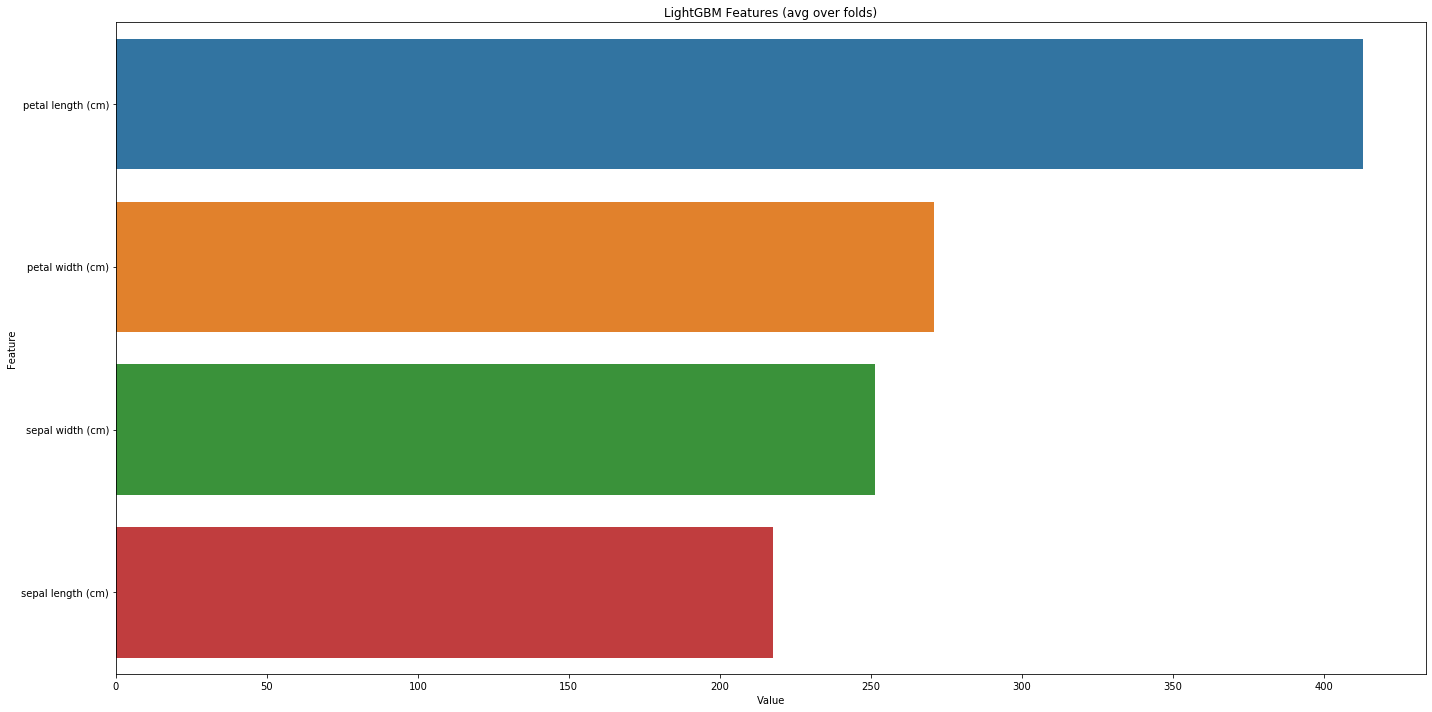

In [0]:
feature_imp = pd.DataFrame(sorted(zip(feature_importances, iris.feature_names)), columns=['Value','Feature'])
print(sorted(zip(clf.feature_importances_, iris.feature_names)))
print(feature_imp)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(150, 2)

### SVM

In [4]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_range_threshold = ['mean', 'median', '1.25*mean']
params = {'feature_selection__estimator__C': [i / 10 for i in range(10, 20)],
          'feature_selection__threshold': param_range_threshold}
eclf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(X, y)
grid.best_params_

{'feature_selection__estimator__C': 1.4,
 'feature_selection__threshold': 'median'}

In [0]:
lsvc = LinearSVC(C=1.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True, threshold=0.2)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(150, 4)

### logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target

clf = LogisticRegression()
clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(150, 3)

## Filter Method

#### variance threshold

In [0]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

iris = load_iris()

print(iris.data.shape)
print(iris.data[:5])
# remove all features whose variance < 3
# if threshold is not specified, remove all 0-variance features
selector = VarianceThreshold(threshold=1)
print(selector.fit_transform(iris.data).shape)
print(selector.fit_transform(iris.data)[:5])
print(selector.get_support(indices=False))
print(selector.get_support(indices=True))

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 1)
[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]]
[False False  True False]
[2]


#### pearson-r

In [0]:
from sklearn.datasets import load_boston
from scipy.stats import pearsonr
import numpy as np

boston = load_boston()
print(boston.data.shape)
def select_by_pearson(X, Y, topk):
    """
    using Pearson Correlation Coefficient
    """
    feature_index_list = []
    for i in range(len(X[1])):
        feature_i = boston.data[:, i]
        corr = pearsonr(feature_i, Y)[0] # correlation with Y, pearsonr outputs a tuple (score, p value)
        feature_index_list.append(corr)
    # argsort returns indices that would sort the array
    print(feature_index_list)
    feature_index_topk_list = np.argsort(np.abs(feature_index_list[::-1]))[0:topk]
    return feature_index_topk_list

feature_index_topk_list = select_by_pearson(boston.data, boston.target, 5)
print(feature_index_topk_list)

(506, 13)
[-0.38830460858681154, 0.36044534245054316, -0.483725160028373, 0.1752601771902984, -0.42732077237328253, 0.6953599470715394, -0.3769545650045963, 0.2499287340859039, -0.3816262306397781, -0.4685359335677672, -0.5077866855375619, 0.3334608196570664, -0.737662726174015]
[ 9  5  1 11  6]


#### chi-squre test

In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

boston = load_boston()
iris = load_iris()

sel = SelectKBest(chi2, k=2)
new_X = sel.fit_transform(iris.data, iris.target)

print(iris.data.shape)
print(new_X.shape)
print(sel.get_support(indices=True))
print(sel.scores_)
print(sel.pvalues_)

(150, 4)
(150, 2)
[2 3]
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


#### mutual information

In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np

boston = load_boston()
iris = load_iris()

sel = SelectKBest(mutual_info_classif, k=2)
new_X = sel.fit_transform(iris.data, iris.target)

print(iris.data.shape)
print(new_X.shape)
print(sel.get_support(indices=True))
print(sel.scores_)
print(sel.pvalues_)

(150, 4)
(150, 2)
[2 3]
[0.53480876 0.25384192 0.97983332 0.98708597]
None


In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import numpy as np

boston = load_boston()
iris = load_iris()

sel = SelectKBest(mutual_info_regression, k=5)
new_X = sel.fit_transform(boston.data, boston.target)

print(boston.data.shape)
print(new_X.shape)
print(sel.get_support(indices=True))
print(sel.scores_)
print(sel.pvalues_)

(506, 13)
(506, 5)
[ 2  4  5 10 12]
[0.33594111 0.18633534 0.47288889 0.02458002 0.46479112 0.53114918
 0.30987676 0.29679503 0.2312889  0.36291386 0.44037949 0.15784046
 0.66529557]
None


#### f score

In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np

boston = load_boston()
iris = load_iris()

sel = SelectKBest(f_classif, k=2)
new_X = sel.fit_transform(iris.data, iris.target)

print(iris.data.shape)
print(new_X.shape)
print(sel.get_support(indices=True))
print(sel.scores_)
print(sel.pvalues_)

(150, 4)
(150, 2)
[2 3]
[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]


In [0]:
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import numpy as np

boston = load_boston()
iris = load_iris()

sel = SelectKBest(f_regression, k=5)
new_X = sel.fit_transform(boston.data, boston.target)

print(boston.data.shape)
print(new_X.shape)
print(sel.get_support(indices=True))
print(sel.scores_)
print(sel.pvalues_)

(506, 13)
(506, 5)
[ 2  5  9 10 12]
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]
[1.17398708e-19 5.71358415e-17 4.90025998e-31 7.39062317e-05
 7.06504159e-24 2.48722887e-74 1.56998221e-18 1.20661173e-08
 5.46593257e-19 5.63773363e-29 1.60950948e-34 1.31811273e-14
 5.08110339e-88]


#### Summary

In [0]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import GenericUnivariateSelect
# modeL 'percentile', 'k_best', 'fpr', 'fdr', 'fwe'
iris = load_iris()
X,y = iris.data , iris.target
s1 = GenericUnivariateSelect(score_func=chi2, mode='percentile',param=34) # choose features corresponding to first 34% high scores
s2 = GenericUnivariateSelect(score_func=chi2, mode='k_best',param=2) # choose 2 features with the two best scores
s3 = GenericUnivariateSelect(score_func=chi2, mode='fpr',param=0.05) # remove those features with p-value > 0.05, Select the pvalues below alpha based on False Positive Rate test
s4 = GenericUnivariateSelect(score_func=chi2, mode='fdr',param=0.05) # remove those features with p-value > 0.05, Select the pvalues for an estimated false discovery rate
s5 = GenericUnivariateSelect(score_func=chi2, mode='fwe',param=0.05) # family-wise error rate

In [0]:
print(s1.fit_transform(X, y).shape)
print(s2.fit_transform(X, y).shape)
print(s3.fit_transform(X, y).shape)
print(s4.fit_transform(X, y).shape)
print(s5.fit_transform(X, y).shape)

(150, 2)
(150, 2)
(150, 3)
(150, 3)
(150, 3)


In [0]:
print(s1.scores_, s1.pvalues_)
print(s2.scores_, s2.pvalues_)
print(s3.scores_, s3.pvalues_)
print(s4.scores_, s4.pvalues_)
print(s5.scores_, s5.pvalues_)

[ 10.81782088   3.7107283  116.31261309  67.0483602 ] [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
[ 10.81782088   3.7107283  116.31261309  67.0483602 ] [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
[ 10.81782088   3.7107283  116.31261309  67.0483602 ] [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
[ 10.81782088   3.7107283  116.31261309  67.0483602 ] [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
[ 10.81782088   3.7107283  116.31261309  67.0483602 ] [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
